In [1]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [2]:
function pendulum_dynamics(x)
    l = 1.0
    g = 9.81
    
    θ = x[1]
    θ̇ = x[2]
    
    θ̈ = -(g/l)*sin(θ)
    
    return [θ̇; θ̈]
end

pendulum_dynamics (generic function with 1 method)

In [3]:
function backward_euler_step_fixed_point(fun, x0, h)
    xn = x0
    e = [norm(x0 + h.*fun(xn) - xn)]
    while e[end] > 1e-8
        xn = x0 + h.*fun(xn)
        e = [e; norm(x0 + h.*fun(xn) - xn)]
    end
    
    return xn, e
end

backward_euler_step_fixed_point (generic function with 1 method)

In [5]:
function backward_euler_step_newton(fun, x0, h)
    xn = x0
    r = x0 + h.*fun(xn) - xn
    e = [norm(r)]
    while e[end] > 1e-8
        ∂r = ForwardDiff.jacobian(x -> x0 + h.*fun(x) - x, xn)
        xn = xn - ∂r\r
        r = x0 + h.*fun(xn) - xn
        e = [e; norm(r)]
    end
    
    return xn, e
end

backward_euler_step_newton (generic function with 1 method)

In [6]:
function backward_euler_fixed_point(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        x_hist[:,k+1], e = backward_euler_step_fixed_point(fun, x_hist[:,k], h)
    end
    
    return x_hist, t
end

backward_euler_fixed_point (generic function with 1 method)

In [7]:
function backward_euler_newton(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        x_hist[:,k+1], e = backward_euler_step_newton(fun, x_hist[:,k], h)
    end
    
    return x_hist, t
end

backward_euler_newton (generic function with 1 method)

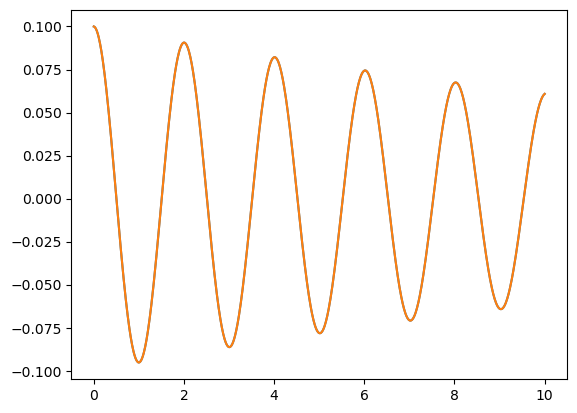

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc108dee160>

In [8]:
x0 = [.1; 0]
x_hist1, t_hist1 = backward_euler_fixed_point(pendulum_dynamics, x0, 10, 0.01)
x_hist2, t_hist2 = backward_euler_newton(pendulum_dynamics, x0, 10, 0.01)
plot(t_hist1, x_hist1[1,:])
plot(t_hist2, x_hist2[1,:])

In [9]:
max(abs.(x_hist1-x_hist2)...)

7.3007510554383426e-6

In [10]:
xn, e1 = backward_euler_step_fixed_point(pendulum_dynamics, x0, 0.1)
e1

14-element Array{Float64,1}:
 0.09793658173053843
 0.009793658173053846
 0.009564124766684667
 0.0009564124766684723
 0.0009343853483241293
 9.343853483241571e-5
 9.128296581455142e-5
 9.128296581450979e-6
 8.917746787032166e-6
 8.917746786990532e-7
 8.712050176828967e-7
 8.712050177106523e-8
 8.511098474606182e-8
 8.511098478769519e-9

In [11]:
xn, e2 = backward_euler_step_newton(pendulum_dynamics, x0, 0.1)
e2

3-element Array{Float64,1}:
 0.09793658173053843
 3.7830087232931797e-6
 5.2874553670659e-15

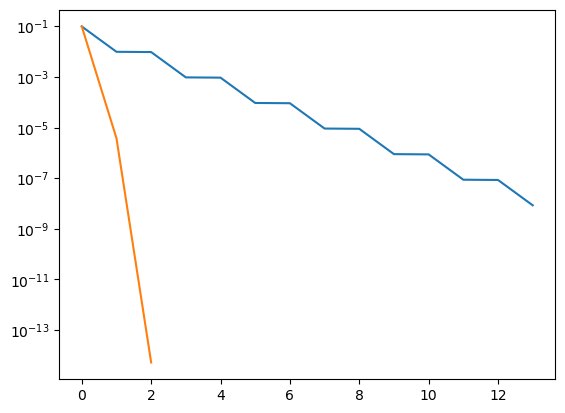

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc107661940>

In [12]:
semilogy(e1)
semilogy(e2)